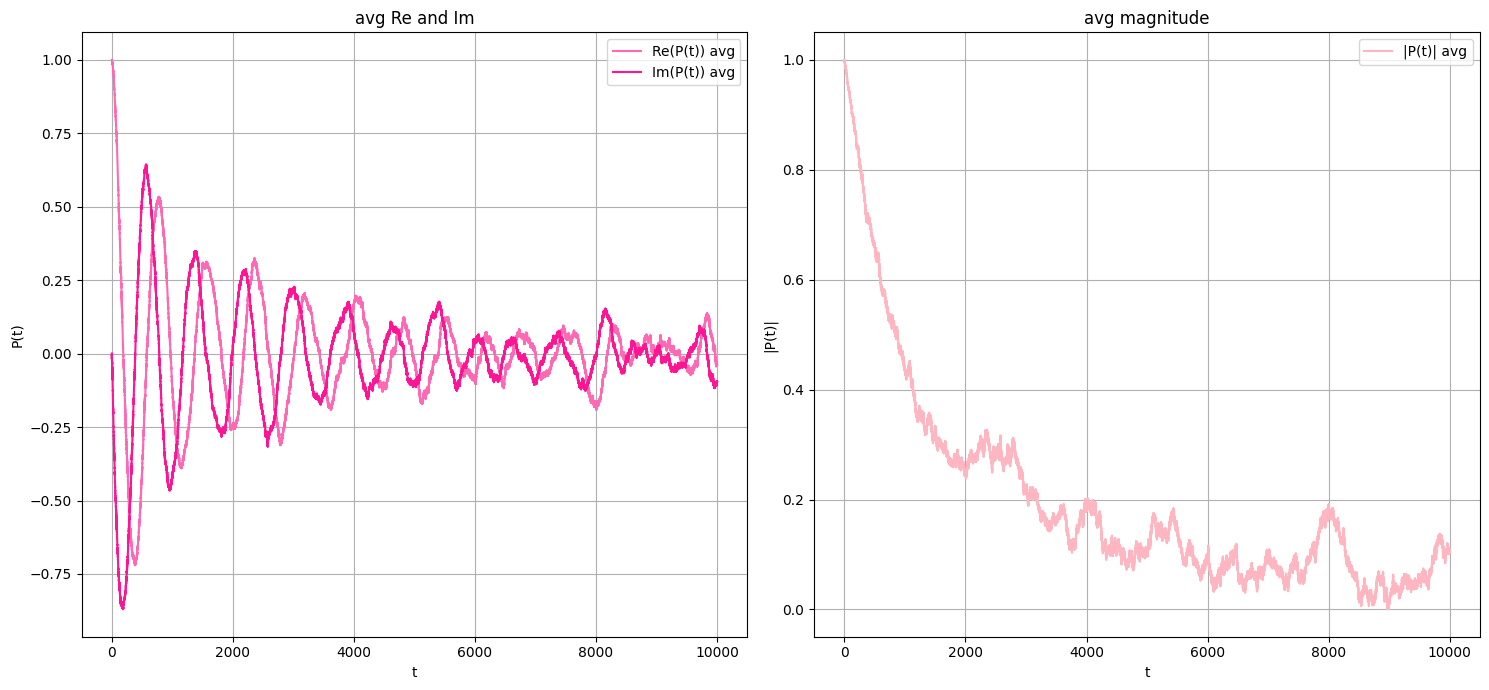

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

E_C = 1.0 # The capacitance of the circuit
n_g0 = 0.501 # starting n_g value (Small offsets make it have a wave?)
std = 0.05 # standard deviation of n_g fluctuations
T = 10000 # time range
dt = 0.01 # step size of integral
num_steps = int(T / dt) # resolution of integral
num_realizations = 100 # number of simulated particles to avg

P_t_all = np.zeros((num_realizations, num_steps), dtype=complex) # 2d list holding the particles, and their values over time
np.random.seed(0)

for i in range(num_realizations):
    n_g_fluctuations = np.random.normal(0, std, num_steps)
    n_g = n_g0 + n_g_fluctuations # should in theory be normalized against dt (wont work due to the random function)
    delta_E = 4 * E_C * (1 - 2 * n_g)
    integrated_E = np.cumsum(delta_E) * dt
    P_t_all[i] = np.exp(1j * integrated_E)

P_t_avg = np.mean(P_t_all, axis=0)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, T, dt), np.real(P_t_avg), label="Re(P(t)) avg",color="hotpink")
plt.plot(np.arange(0, T, dt), np.imag(P_t_avg), label="Im(P(t)) avg",color="deeppink")
plt.xlabel("t")
plt.ylabel("P(t)")
plt.title("avg Re and Im")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, T, dt), np.abs(P_t_avg), label="|P(t)| avg",color="lightpink")
plt.xlabel("t")
plt.ylabel("|P(t)|")
plt.title("avg magnitude")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

E0=0
sigma=0.05
time=100
timesteps=100000
realizations=100

t=np.linspace(0,time,timesteps)

avg=0
for i in range(realizations):
    avg+=np.exp(1j*np.cumsum(E0+np.random.normal(0,sigma,timesteps))*time/timesteps)
avg/=realizations

plt.figure(figsize=(10,10))
plt.plot(t,avg,label='average P(t)', color="lightcoral")
plt.xlabel('time')
plt.ylabel('P(t)')
plt.title('P(t) for superconductive charge qubit in random environment')
plt.legend()
plt.show()